<a href="https://colab.research.google.com/github/periclesrialto/periclesrialto/blob/main/Feature_Selection_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature selection study**

**Resultados**

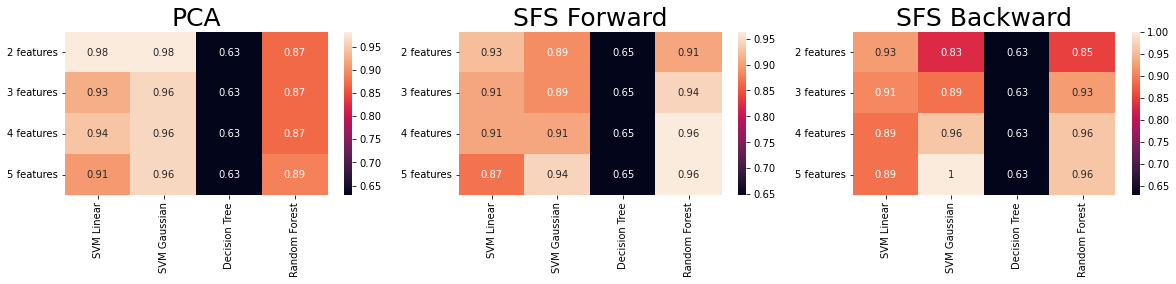



*   A melhor combinação foi SFS Backward com 5 features para SVM Gaussiano. A separação entre teste e treino foi feita com 30% dos dados para teste


**Desenvolvimento**

In [ ]:
#Importa os frameworks e bibliotecas utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
#Importa o dataframe e atribui nome para as colunas do dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
svm = SVC(kernel='linear', random_state=1, gamma=0.0001, C=80.0)
svmg = SVC(kernel='rbf', random_state=1, gamma=0.0001, C=80.0)
rfc = RandomForestClassifier(max_depth=1, random_state=0)

classifiers = [svm, svmg, tree, rfc]

Text(0.5, 1.0, 'PCA')

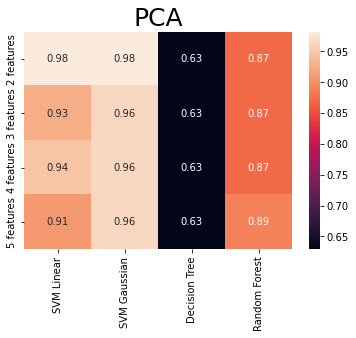

In [ ]:
scores_pca = np.zeros((4,4))
max_main_features = 5
classifier_num = 4

for classifier in range(0, classifier_num):
  for features in range(2, max_main_features + 1):
    pipe_train_pca = Pipeline([('scaler', StandardScaler()),
                               ('pca', PCA(n_components=features)),
                               ("classifier",classifiers[classifier])])
    pipe_test_pca = Pipeline([('scaler', StandardScaler()),
                              ('pca', PCA(n_components=features))])
    pipe_train_pca.fit(X_train, y_train)
    pipe_test_pca.fit(X_test, y_test)
    test_score = pipe_train_pca.score(X_test, y_test)

    scores_pca[features-2][classifier] = test_score

scores_pca_df = pd.DataFrame(scores_pca)
scores_pca_df.columns = ['SVM Linear', 'SVM Gaussian','Decision Tree',
                         'Random Forest']
scores_pca_df.index  = ['2 features', '3 features', '4 features',
                        '5 features']
sns.heatmap(scores_pca_df, annot=True).set_title('PCA', fontdict={'fontsize':25})

Text(0.5, 1.0, 'SFS Forward')

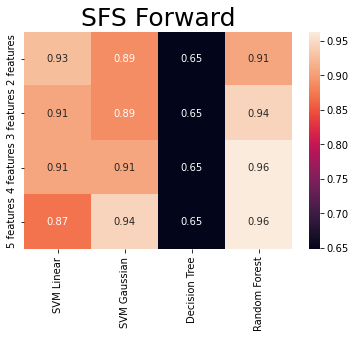

In [ ]:
scores_fwd = np.zeros((4,4))
max_main_features = 5
classifier_num = 4

for classifier in range(0, classifier_num):
  for features in range(2,max_main_features + 1):
    pipe_train_sfsf = Pipeline([('scaler', StandardScaler()),
                                ('sfs', sfs(classifiers[classifier], 
                                            n_features_to_select=features,
                                            direction='forward',
                                            scoring='accuracy', cv=5)),
                                 ("classifier",classifiers[classifier])])
    pipe_test_sfsf = Pipeline([('scaler', StandardScaler()),
                               ('sfs', sfs(classifiers[classifier], 
                                           n_features_to_select=features,
                                           direction='forward',
                                           scoring='accuracy', cv=5))])
    pipe_train_sfsf.fit(X_train, y_train)
    pipe_test_sfsf.fit(X_test, y_test)
    test_score = pipe_train_sfsf.score(X_test, y_test)

    scores_fwd[features-2][classifier] = test_score

scores_fwd_df = pd.DataFrame(scores_fwd)
scores_fwd_df.columns = ['SVM Linear', 'SVM Gaussian','Decision Tree',
                         'Random Forest']
scores_fwd_df.index  = ['2 features', '3 features', '4 features',
                        '5 features']
sns.heatmap(scores_fwd_df, annot=True).set_title('SFS Forward', fontdict={'fontsize':25})

Text(0.5, 1.0, 'SFS Backward')

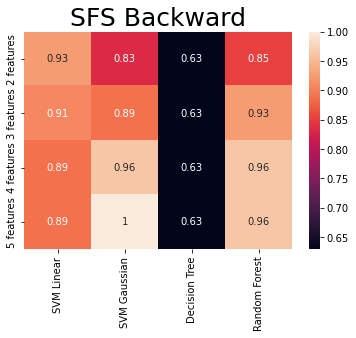

In [ ]:
scores_bck = np.zeros((4,4))
max_main_features = 5
classifier_num = 4

for classifier in range(0, classifier_num):
  for features in range(2,max_main_features + 1):
    pipe_train_sfsb = Pipeline([('scaler', StandardScaler()),
                                ('sfs', sfs(classifiers[classifier],
                                            n_features_to_select=features,
                                            direction='backward',
                                            scoring='accuracy', cv=5)),
                                 ("classifier",classifiers[classifier])])
    pipe_test_sfsb = Pipeline([('scaler', StandardScaler()),
                               ('sfs', sfs(classifiers[classifier], 
                                           n_features_to_select=features,
                                           direction='backward',
                                           scoring='accuracy', cv=5))])
    pipe_train_sfsb.fit(X_train, y_train)
    pipe_test_sfsb.fit(X_test, y_test)
    test_score = pipe_train_sfsb.score(X_test, y_test)

    scores_bck[features-2][classifier] = test_score

scores_bck_df = pd.DataFrame(scores_bck)
scores_bck_df.columns = ['SVM Linear', 'SVM Gaussian','Decision Tree',
                         'Random Forest']
scores_bck_df.index  = ['2 features', '3 features', '4 features',
                        '5 features']
sns.heatmap(scores_bck_df, annot=True).set_title('SFS Backward', fontdict={'fontsize':25})

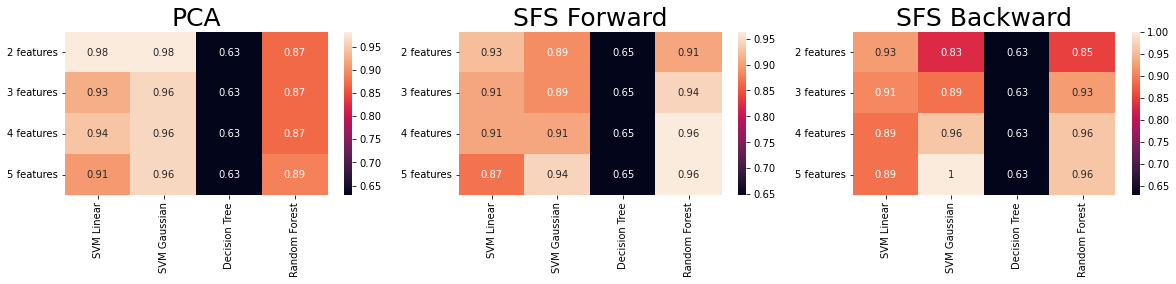

In [ ]:
#Plota a figura com os resultados
plt.subplot2grid((1,3), (0,0))
sns.heatmap(scores_pca_df, annot=True).set_title('PCA', fontdict={'fontsize':25})
plt.subplot2grid((1,3), (0,1))
sns.heatmap(scores_fwd_df, annot=True).set_title('SFS Forward', fontdict={'fontsize':25})
plt.subplot2grid((1,3), (0,2))
sns.heatmap(scores_bck_df, annot=True).set_title('SFS Backward', fontdict={'fontsize':25})

plt.rcParams["figure.figsize"] = (20,30)